PCA 1

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv("/content/data (1).csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.drop(["Unnamed: 32","id"],axis=1,inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data["diagnosis"] = [1 if item == "M" else 0  for item in data["diagnosis"]]

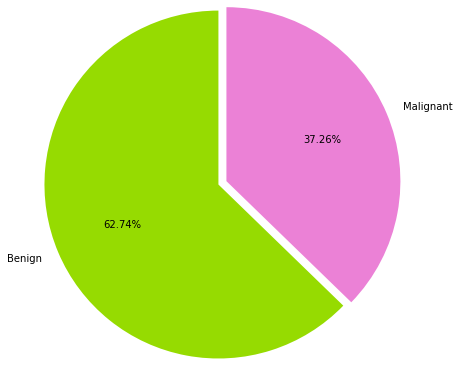

In [6]:
colors = ['#96db01','#eb81d6']
plt.pie(data.diagnosis.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Benign', 'Malignant'], colors= colors,radius=2)
plt.show()

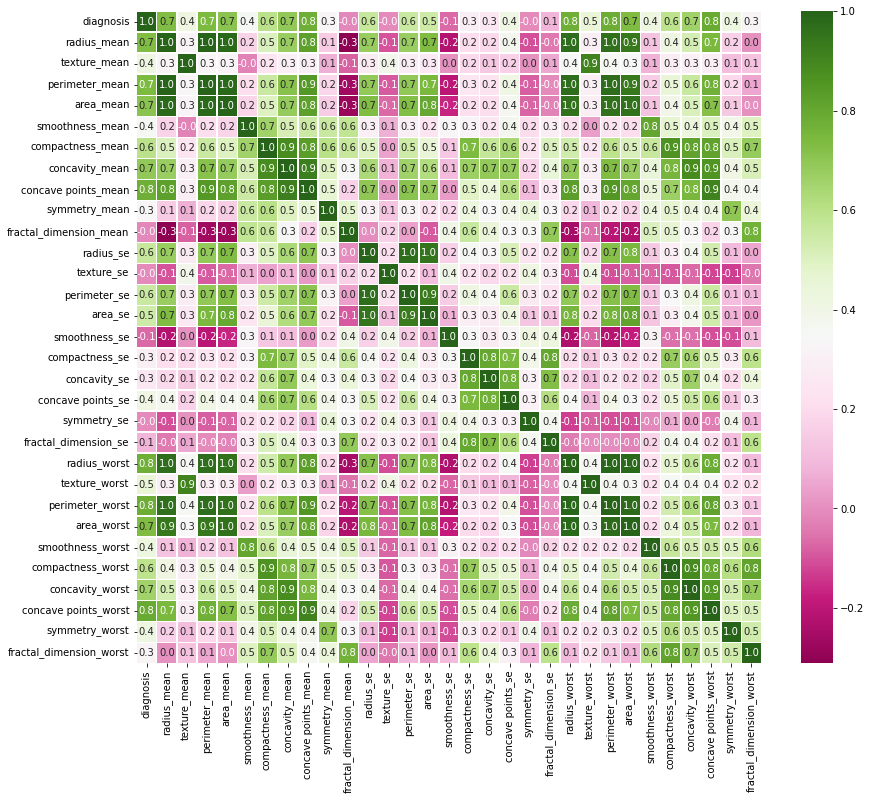

In [7]:
import seaborn as sns
f,ax = plt.subplots(figsize=(14,12))
sns.heatmap(data.corr(), cmap="PiYG", annot=True, linewidths=0.5, fmt= '.1f',ax=ax)
plt.show()

In [8]:
x = data.drop(['diagnosis'], axis = 1)
y = data.loc[:,"diagnosis"].values

In [9]:
col = x.columns

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [12]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [13]:
r_forest = RandomForestClassifier(max_depth=100, random_state=0)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
scores = cross_val_score(r_forest, x, y, scoring='accuracy', cv=cv)
rf_score = np.mean(scores)

print('Accuracy : %.3f' % (rf_score))

Accuracy : 0.962


In [14]:
y_pred = cross_val_predict(r_forest, x, y, cv=10)
cf_matrix = confusion_matrix(y, y_pred)

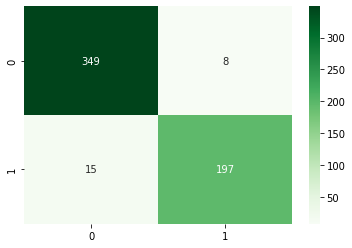

In [15]:
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Greens")
plt.show()

In [16]:
 for i in range(1,16):
    neigh = KNeighborsClassifier(n_neighbors=i)
    cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
    scores = cross_val_score(neigh, x, y, scoring='accuracy', cv=cv)
    print('k=%d : %.3f' % (i, (np.mean(scores))))

k=1 : 0.953
k=2 : 0.958
k=3 : 0.967
k=4 : 0.967
k=5 : 0.969
k=6 : 0.965
k=7 : 0.966
k=8 : 0.965
k=9 : 0.970
k=10 : 0.966
k=11 : 0.968
k=12 : 0.964
k=13 : 0.964
k=14 : 0.961
k=15 : 0.962


In [17]:
neigh = KNeighborsClassifier(n_neighbors=9)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
scores = cross_val_score(neigh, x, y, scoring='accuracy', cv=cv)
knn_score = np.mean(scores)

print('Accuracy : %.3f' % (knn_score))

Accuracy : 0.970


In [18]:
y_pred = cross_val_predict(neigh, x, y, cv=10)
cf_matrix = confusion_matrix(y, y_pred)

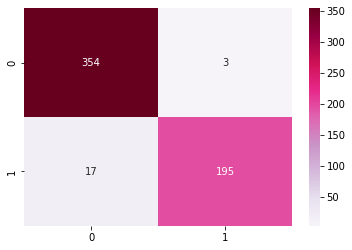

In [19]:
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="PuRd")
plt.show()

In [20]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)
pca_ = pca.transform(x)

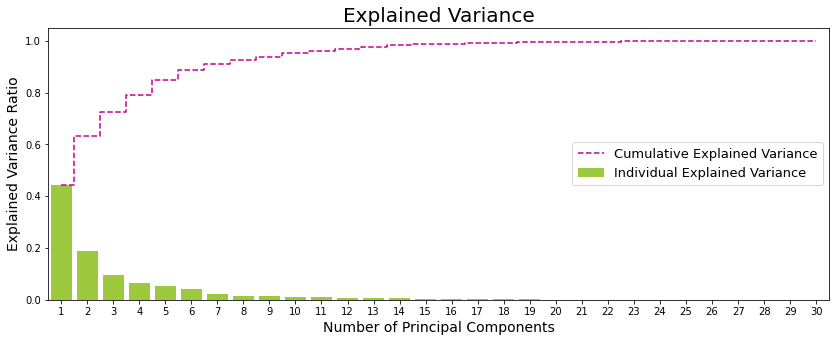

In [21]:
fig, ax = plt.subplots(figsize=(14, 5))
plt.plot(range(x.shape[1]), pca.explained_variance_ratio_.cumsum(), linestyle='--', drawstyle='steps-mid', color='#c4008f',
         label='Cumulative Explained Variance')
sns.barplot(np.arange(1,x.shape[1]+1), pca.explained_variance_ratio_, alpha=0.85, color='#96db01',
            label='Individual Explained Variance')

plt.ylabel('Explained Variance Ratio', fontsize = 14)
plt.xlabel('Number of Principal Components', fontsize = 14)
ax.set_title('Explained Variance', fontsize = 20)
plt.legend(loc='center right', fontsize = 13);

In [22]:
pca = PCA(2)
pca.fit(x)
pca_ = pca.transform(x)

In [23]:
r_forest = RandomForestClassifier(max_depth=100, random_state=0)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
scores = cross_val_score(r_forest, pca_, y, scoring='accuracy', cv=cv)
r_score = np.mean(scores)

print('Accuracy : %.3f' % (r_score))

Accuracy : 0.937


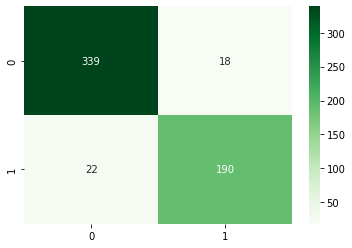

In [24]:
y_pred = cross_val_predict(r_forest, pca_, y, cv=10)
cf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Greens")
plt.show()

In [25]:
neigh = KNeighborsClassifier(n_neighbors=9)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
scores = cross_val_score(neigh, pca_, y, scoring='accuracy', cv=cv)
knn_score = np.mean(scores)

print('Accuracy : %.3f' % (knn_score))

Accuracy : 0.944


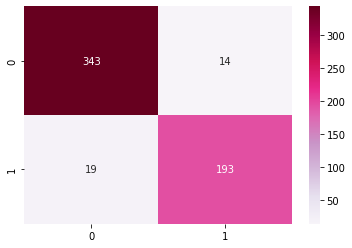

In [26]:
y_pred = cross_val_predict(neigh, pca_, y, cv=10)
cf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="PuRd")
plt.show()

In [27]:
pca = PCA(5)
pca.fit(x)
pca_ = pca.transform(x)

In [28]:
r_forest = RandomForestClassifier(max_depth=100, random_state=0)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
scores = cross_val_score(r_forest, pca_, y, scoring='accuracy', cv=cv)
r_score = np.mean(scores)

print('Accuracy : %.3f' % (r_score))

Accuracy : 0.954


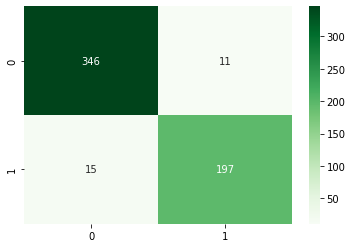

In [29]:
y_pred = cross_val_predict(r_forest, pca_, y, cv=10)
cf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Greens")
plt.show()

In [30]:
neigh = KNeighborsClassifier(n_neighbors=9)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
scores = cross_val_score(neigh, pca_, y, scoring='accuracy', cv=cv)
knn_score = np.mean(scores)

print('Accuracy : %.3f' % (knn_score))

Accuracy : 0.960


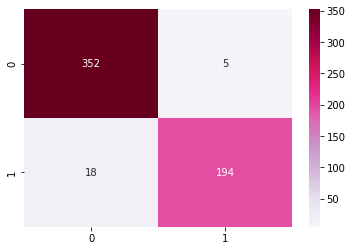

In [31]:
y_pred = cross_val_predict(neigh, pca_, y, cv=10)
cf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="PuRd")
plt.show()

In [32]:
pca = PCA(10)
pca.fit(x)
pca_ = pca.transform(x)

In [33]:
r_forest = RandomForestClassifier(max_depth=100, random_state=0)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
scores = cross_val_score(r_forest, pca_, y, scoring='accuracy', cv=cv)
r_score = np.mean(scores)

print('Accuracy : %.3f' % (r_score))

Accuracy : 0.950


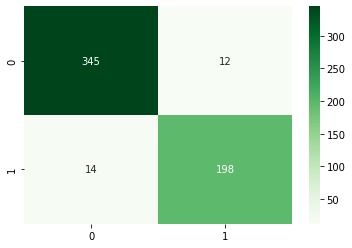

In [34]:
y_pred = cross_val_predict(r_forest, pca_, y, cv=10)
cf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Greens")
plt.show()

In [35]:
neigh = KNeighborsClassifier(n_neighbors=9)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
scores = cross_val_score(neigh, pca_, y, scoring='accuracy', cv=cv)
knn_score = np.mean(scores)

print('Accuracy : %.3f' % (knn_score))

Accuracy : 0.966


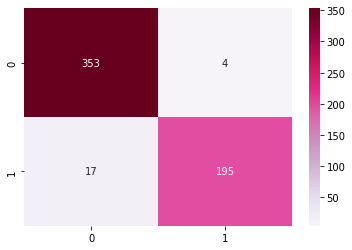

In [36]:
y_pred = cross_val_predict(neigh, pca_, y, cv=10)
cf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="PuRd")
plt.show()